In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("http://kati.web.cern.ch/kati/SingleMuonMet.csv")

In [3]:
pd.set_option("display.max_columns",None)
data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,iso1,chisq1,dxy1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,iso2,chisq2,dxy2,met_et,met_phi
0,173389,489861810,G,81.20700,-19.73920,-13.390400,77.62490,23.85240,1.895960,-2.545530,1,0.757915,0.859481,0.001574,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,4.87528,-1.477850
1,173389,489865843,G,20.89240,-14.55570,-14.942700,1.15372,20.86030,0.055279,-2.343080,1,7.996410,0.861278,0.017863,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,24.22140,-1.851490
2,173389,489914455,G,12.95950,3.13972,-3.732570,-12.00610,4.87749,-1.632850,-0.871451,-1,2.153700,0.856005,0.093071,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,7.47978,-1.580460
3,173389,489963747,G,29.63810,6.25372,28.679100,-4.09978,29.35300,-0.139221,1.356100,1,0.000000,0.845578,-0.060012,G,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.000000,30.66700,-2.130810
4,173389,489925803,G,7.01111,-1.61130,0.006709,-6.82262,1.61131,-2.150000,3.137430,-1,0.643718,2.970230,-0.041494,G,11.2786,1.43852,2.48368,-10.9068,2.87019,-2.04503,1.04582,1.0,1.36497,8.03214,-0.045094,13.75300,-0.996907


Eero

In [6]:
newE = data[(data["met_et"]>30) & (data["chisq1"]<1) &(data["eta1"]>1) & (data["pt1"]>35)]
MTE = np.sqrt(2*newE.pt1*newE.met_et*(1-np.cos(newE.phi1-newE.met_phi)))

Jenny

In [8]:
newJ = data[(data.pt2==0)&(data.pt1>40)&(np.abs(data.eta1)<1)]
MTJ = np.sqrt(2*newJ.pt1*newJ.met_et*(1-np.cos(newJ.phi1-newJ.met_phi)))

Taneli

In [10]:
newT = data[(data["met_et"]>30) & (data["chisq1"]<5) &(data["eta1"]<1) & (data["pt1"]>35)]
MTT = np.sqrt(2*newT.pt1*newT.met_et*(1-np.cos(newT.phi1-newT.met_phi)))

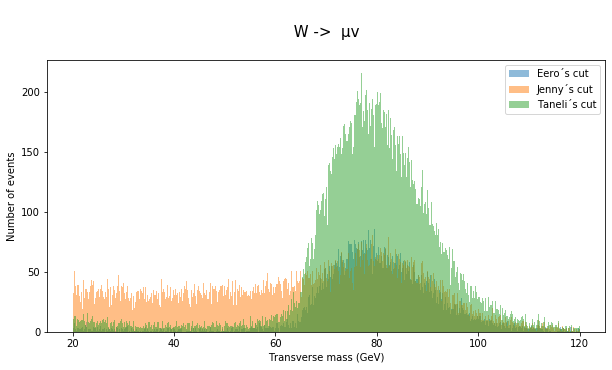

In [14]:
plt.figure(figsize=(10,5))
plt.hist(MTE, bins=500, range=(20,120), alpha=0.5, label="Eero´s cut")
plt.hist(MTJ, bins=500, range=(20,120), alpha=0.5, label="Jenny´s cut")
plt.hist(MTT, bins=500, range=(20,120), alpha=0.5, label="Taneli´s cut")

plt.title("\n W ->  μv \n", fontsize=15)
plt.xlabel("Transverse mass (GeV)", fontsize=10)
plt.ylabel("Number of events", fontsize=10)
plt.legend()
plt.show()